# 04_visualize_anchors

In [1]:
import os

import cv2
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def visualize(wh_in_yolov2):
    stride = 32

    colors = [(255, 0, 0), (255, 255, 0), (0, 255, 0), (0, 0, 255), (0, 255, 255), (55, 0, 0),
              (255, 55, 0), (0, 55, 0), (0, 0, 25), (0, 255, 55)]

    anchor_path = dataset_disk + 'generated_anchors/'
    for i in range(1, 11):
        cv2.namedWindow('%d_anchors' % int(i))
        cv2.moveWindow('%d_anchors' % int(i), 100, 100)
        blank_image = np.zeros((wh_in_yolov2[0], wh_in_yolov2[1], 3), np.uint8)
        blank_image += 255
        anchor_txt = anchor_path + 'anchors_%d.txt' % int(i)
        anchors = []
        with open(anchor_txt, 'r') as f:
            for i, line in enumerate(f):
                line = line.rstrip('\n')
                anchor = line.split(', ')
                anchors.append(anchor)

        output_img = os.path.join(anchor_txt).replace('.txt', '.png')
        stride_h = 10
        stride_w = 3
        for i in range(len(anchors)):
            (w, h) = map(float, anchors[i])

            w = int(w * stride)
            h = int(h * stride)
            print(w, h)

            # make sure starting coordinates of anchors do not overlap each other
            offset_x = 10 + i * stride_w
            offset_y = 10 + i * stride_h

            cv2.rectangle(blank_image, (offset_x, offset_y), (offset_x + w, offset_y + h), colors[i])

#             cv2.imshow('%d_anchors' % int(i+1), blank_image)
            cv2.waitKey(1000)
            cv2.imwrite(output_img, blank_image)
        plt.imshow(blank_image)
        plt.title('%d_anchors' % int(i+1))
        plt.show()
        print('')

    print('Done!')

320 232


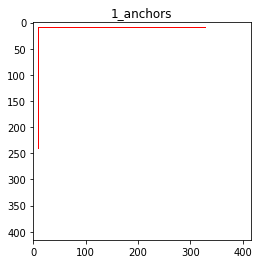


190 146
365 262


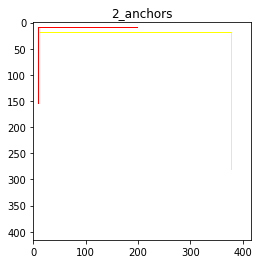


151 129
303 199
382 284


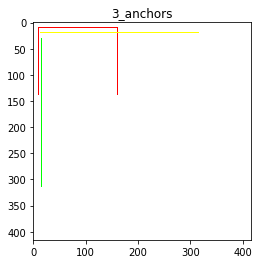


149 124
256 221
362 176
384 284


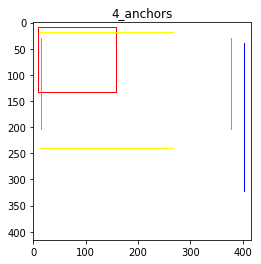


138 116
221 200
345 239
345 155
390 297


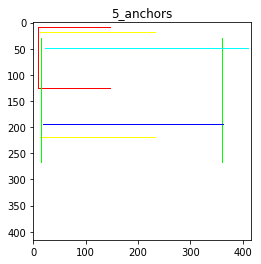


134 112
204 187
295 253
329 147
385 218
395 296


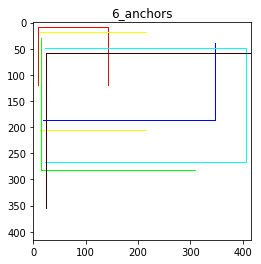


126 102
177 165
257 224
325 273
326 144
384 214
403 296


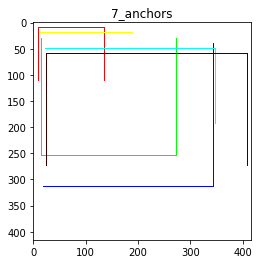


122 96
164 155
242 193
269 251
330 138
337 277
380 211
406 296


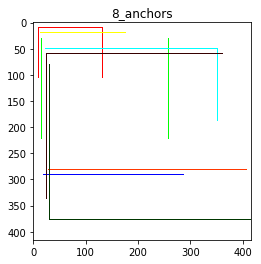


119 94
160 147
213 205
288 224
305 128
318 282
372 179
391 240
403 301


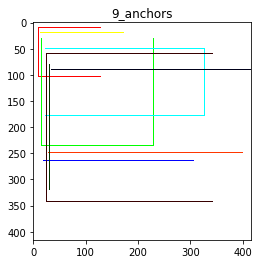


115 84
140 136
200 158
216 224
286 264
297 195
342 131
348 277
392 214
407 297


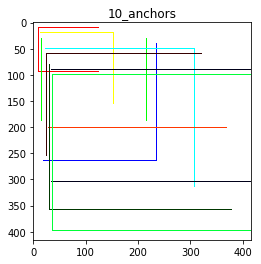


Done!


In [5]:
wn_in_yolov2 = [416, 416]
dataset_disk = '/Volumes/JS/UECFOOD100_JS/'
visualize(wn_in_yolov2)